# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "/Users/kaylabiddle/Desktop/Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/kaylabiddle/Desktop/Starter_Code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')

# Display the data table for preview
print(merged_data.head())


  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [95]:
# Checking the number of mice.
unique_mouse_IDs = merged_data["Mouse ID"].nunique()
print(f"Number of Unique mice IDs: {unique_mouse_IDs}")

Number of Unique mice IDs: 249


In [96]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicates = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicates_mouse_id = duplicates['Mouse ID'].unique()

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(f"Mice ID with duplicate enteries: {duplicates_mouse_id}")

  

Mice ID with duplicate enteries: ['g989']


In [97]:
# Optional: Get all the data for the duplicate mouse ID. 
if not duplicates.empty:
    duplicates_mouse_id = duplicates['Mouse ID'].iloc[0]
    print("Data associated with Mouse ID:")
    print(duplicates[duplicates["Mouse ID"] == duplicates_mouse_id])

Data associated with Mouse ID:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  


In [98]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop_duplicates(['Mouse ID', 'Timepoint'], keep='first')

print("Cleaned DataFrame:")
print(cleaned_data)

Cleaned DataFrame:
     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898              

In [99]:
# Checking the number of mice in the clean DataFrame.
unique_mice_ids_cleaned = cleaned_data['Mouse ID'].nunique()
print(f"Updated number of unique mice IDs after cleaning: {unique_mice_ids_cleaned}")

Updated number of unique mice IDs after cleaning: 249


## Summary Statistics

In [100]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean= 'mean',
    median= 'median',
    variance= 'var',
    std_dev= 'std',
    SEM= lambda x: x.sem()
).reset_index()

# Assemble the resulting series into a single summary DataFrame.
print(summary_stats)

  Drug Regimen       mean     median   variance   std_dev       SEM
0    Capomulin  40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin  52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol  52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril  55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol  54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo  54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva  52.322552  50.854632  42.351070  6.507770  0.512884
7     Ramicane  40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn  54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol  53.236507  51.818479  48.533355  6.966589  0.516398


In [101]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats = summary_stats.T
# Using the aggregation method, produce the same summary statistics in a single line
print(summary_stats)

#Is this what it is asking for?

                      0          1          2          3          4  \
Drug Regimen  Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
mean          40.675741  52.591172  52.884795  55.235638  54.331565   
median        41.557809  51.776157  51.820584  53.698743  52.509285   
variance      24.947764  39.290177  43.128684  68.553577  66.173479   
std_dev        4.994774   6.268188   6.567243   8.279709   8.134708   
SEM            0.329346   0.469821   0.492236    0.60386   0.596466   

                      5          6          7          8          9  
Drug Regimen    Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
mean          54.033581  52.322552  40.216745  54.233149  53.236507  
median        52.288934  50.854632  40.673236  52.431737  51.818479  
variance      61.168083   42.35107  23.486704  59.450562  48.533355  
std_dev        7.821003    6.50777   4.846308   7.710419   6.966589  
SEM            0.581331   0.512884   0.320955   0.573111   0.516398  


## Bar and Pie Charts

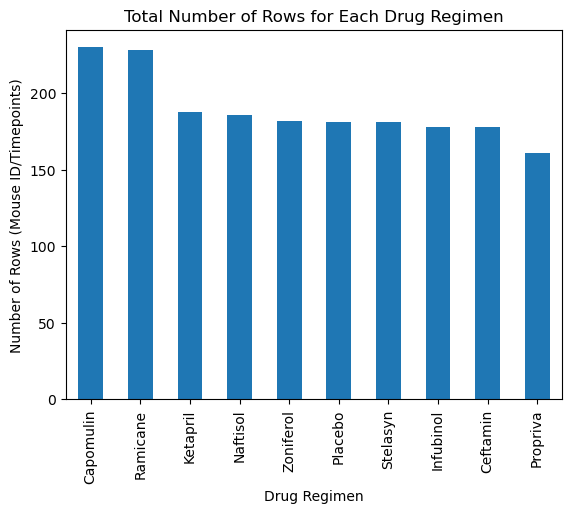

In [102]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts= merged_data['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar')

plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')

plt.show()

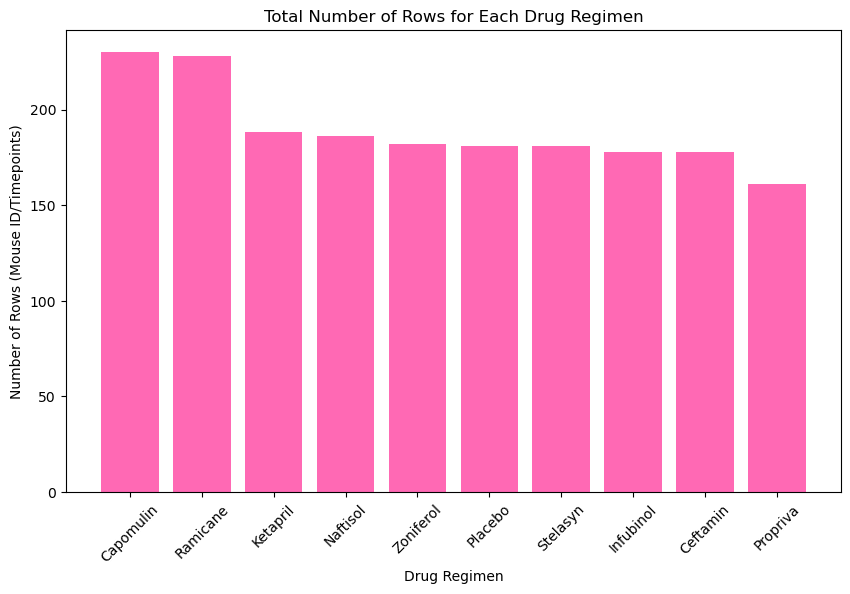

In [103]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='hotpink')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:title={'center':'Distribution of Female vs. Male Mice'}, ylabel='Sex'>

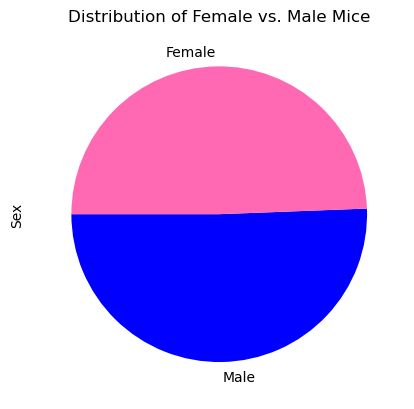

In [104]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = merged_data['Sex'].value_counts()
colors = ['blue', 'hotpink'] if mice_gender.index[0] == 'Male' else ['hotpink', 'blue']
Title= 'Distribution of Female vs. Male Mice'
mice_gender.plot.pie(startangle= 180, colors=colors, title=Title)


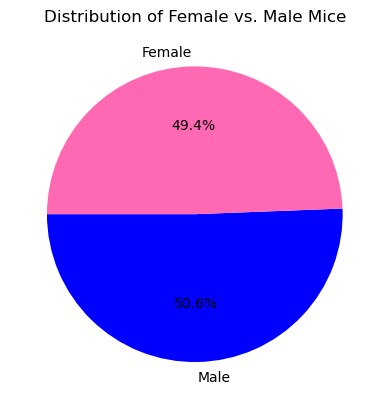

In [116]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_gender, labels=mice_gender.index, autopct='%1.1f%%', startangle=180, colors=colors)
plt.title(Title)
plt.show()

## Quartiles, Outliers and Boxplots

In [118]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

filtered_data = merged_data[merged_data['Drug Regimen'].isin(treatments)]
max_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
final_tumor_volume = pd.merge(max_timepoints, merged_data, on=['Mouse ID', 'Timepoint'], how='left')[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

print(final_tumor_volume)


   Mouse ID Drug Regimen  Tumor Volume (mm3)
0      a203    Infubinol           67.973419
1      a251    Infubinol           65.525743
2      a275     Ceftamin           62.999356
3      a411     Ramicane           38.407618
4      a444     Ramicane           43.047543
..      ...          ...                 ...
95     y769     Ceftamin           68.594745
96     y793    Capomulin           31.896238
97     y865     Ceftamin           64.729837
98     z578     Ramicane           30.638696
99     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [147]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
max = filtered_data.groupby('Mouse ID')['Tumor Volume (mm3)'].last()
quartiles = max.quantile([0.25, 0.75])
Q1 = quartiles[0.25]
Q3 = quartiles[0.75]
IQR = Q3 - Q1

lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

outliers = [value for value in final_tumor_volume if value < lower_bound or value > upper_bound]
outliers_found = False

print('Quartiles')
print(f'Q1: {Q1}, Q3: {Q3}')
print(f'IQR: {IQR}')
print(f'Upper Bound: {upper_bound}')
print(f'Lower Bound: {lower_bound}')
if len(outliers) > 0:
    outliers_found = True
    print(f"Potential outliers for {treatments}: {outliers}")
else:
    print(f"No potential outliers for {treatments}")
    # add subset 
    # Determine outliers using upper and lower bounds


Quartiles
Q1: 37.1877438025, Q3: 59.930261755
IQR: 22.742517952499995
Upper Bound: 94.04403868374999
Lower Bound: 3.0739668737500097
No potential outliers for ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


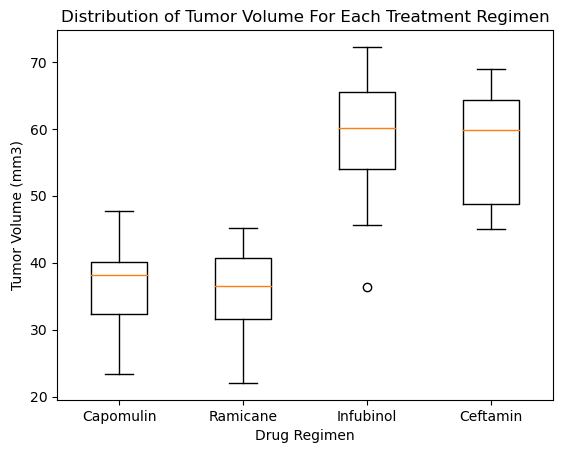

In [201]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

CapData = filtered_data.loc[filtered_data["Drug Regimen"] == "Capomulin"]
RamData = filtered_data.loc[filtered_data["Drug Regimen"] == "Ramicane"]
InfData = filtered_data.loc[filtered_data["Drug Regimen"] == "Infubinol"]
CefData = filtered_data.loc[filtered_data["Drug Regimen"] == "Ceftamin"]

CapVol = CapData.groupby('Mouse ID')['Tumor Volume (mm3)'].last()
RamVol = RamData.groupby('Mouse ID')['Tumor Volume (mm3)'].last()
InfVol = InfData.groupby('Mouse ID')['Tumor Volume (mm3)'].last()
CefVol = CefData.groupby('Mouse ID')['Tumor Volume (mm3)'].last()

DrugVol = [CapVol, RamVol, InfVol, CefVol]

plt.boxplot(DrugVol, labels=treatments)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume For Each Treatment Regimen')
plt.show()

## Line and Scatter Plots

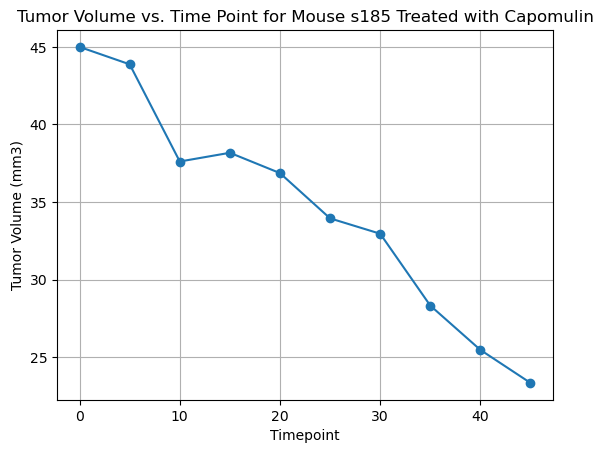

In [205]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
CapMouID = CapData['Mouse ID'].iloc[0]
CapMouData = CapData.loc[CapData["Mouse ID"] == CapMouID]

plt.plot(CapMouData["Timepoint"], CapMouData["Tumor Volume (mm3)"], marker= 'o')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Time Point for Mouse {CapMouID} Treated with Capomulin")
plt.grid(True)

plt.show()

## Correlation and Regression Over Scatter Plot

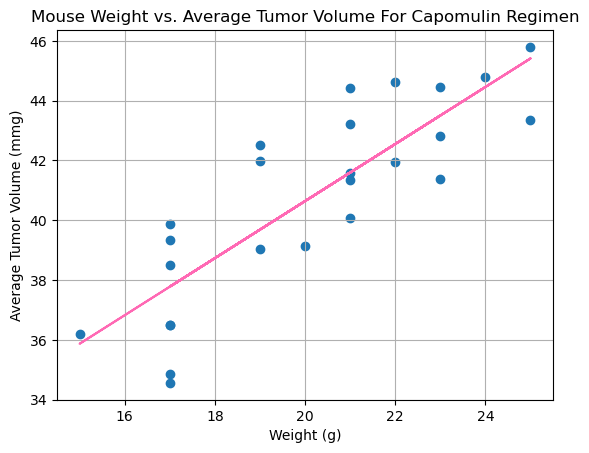

Linear regression model: Tumor Volume = 0.95 * Weight + 21.55
R-squared: 0.71
p-value: 1.32e-07


In [222]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

meanVol = CapData.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
CapMerge = pd.merge(meanVol, CapData[['Mouse ID','Weight (g)']].drop_duplicates(), on = 'Mouse ID')
 
from scipy.stats import linregress

correlation = CapMerge['Weight (g)'].corr(CapMerge['Tumor Volume (mm3)'])
slope, intercept, r_value, p_value, std_err = linregress(CapMerge['Weight (g)'], CapMerge['Tumor Volume (mm3)'])
regression_line = slope * CapMerge['Weight (g)'] + intercept

plt.scatter(CapMerge['Weight (g)'], CapMerge['Tumor Volume (mm3)'], marker = 'o')
plt.plot(CapMerge['Weight (g)'], regression_line, color = 'hotpink', label='Regreaaion Line')
plt.xlabel('Weight (g)')
plt.ylabel("Average Tumor Volume (mmg)")
plt.title('Mouse Weight vs. Average Tumor Volume For Capomulin Regimen')
plt.grid(True)
plt.show()

print(f'Linear regression model: Tumor Volume = {slope:.2f} * Weight + {intercept:.2f}')
print(f'R-squared: {r_value**2:.2f}')
print(f'p-value: {p_value:.2e}')